In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
X=np.random.randint(20,40,20)
Y=np.random.randint(20,40,20)
Y

array([21, 21, 39, 26, 20, 21, 24, 30, 24, 38, 36, 20, 33, 30, 28, 27, 27,
       33, 22, 38])

<BarContainer object of 20 artists>

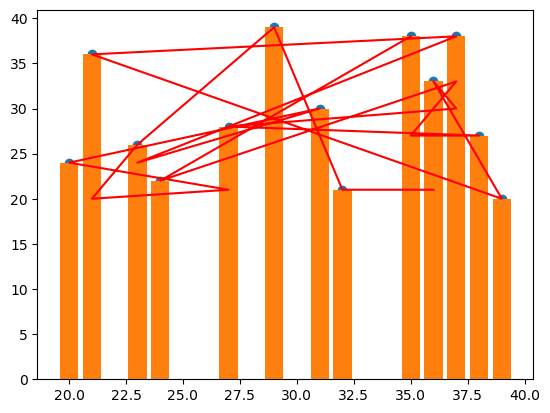

In [3]:
plt.scatter(X,Y)
plt.plot(X,Y,color="red")
plt.bar(X,Y)


In [7]:
student_dataset=pd.read_csv("Student_Performance.csv")
student_dataset["Extracurricular Activities"]=pd.factorize(student_dataset["Extracurricular Activities"])[0]
X = student_dataset.iloc[:,:-1]
y = student_dataset.iloc[:, [-1]]

# Initialize the model (e.g., Linear Regression)
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)
pred=model.predict(X)
student_dataset.iloc[:25,1]

0     99
1     82
2     51
3     52
4     75
5     78
6     73
7     45
8     77
9     89
10    91
11    79
12    47
13    47
14    79
15    72
16    73
17    83
18    54
19    75
20    99
21    96
22    74
23    85
24    61
Name: Previous Scores, dtype: int64

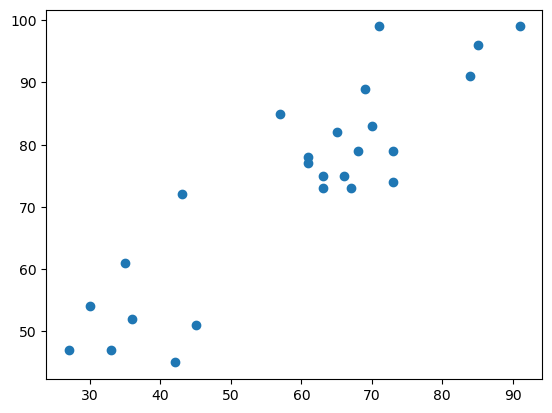

In [12]:
plt.scatter(student_dataset.iloc[:25,-1],student_dataset.iloc[:25,1])

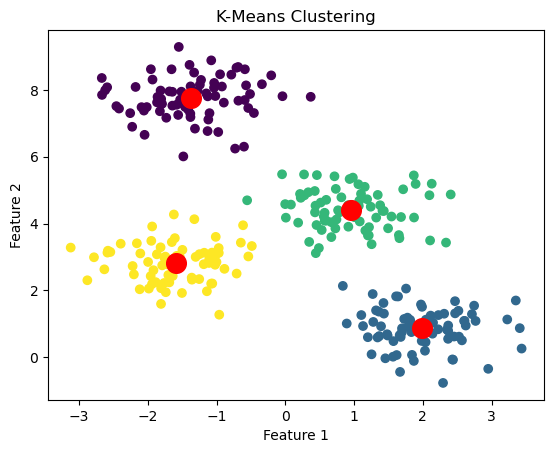

array([7.75368871, 0.86771314, 4.41906906, 2.83081263])

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data using make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Create a KMeans instance with the number of clusters (k) you want to find
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=200, c='red')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")
plt.show()
cluster_centers[:, 1]

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the iris dataset (you can replace it with any other dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy: 0.9


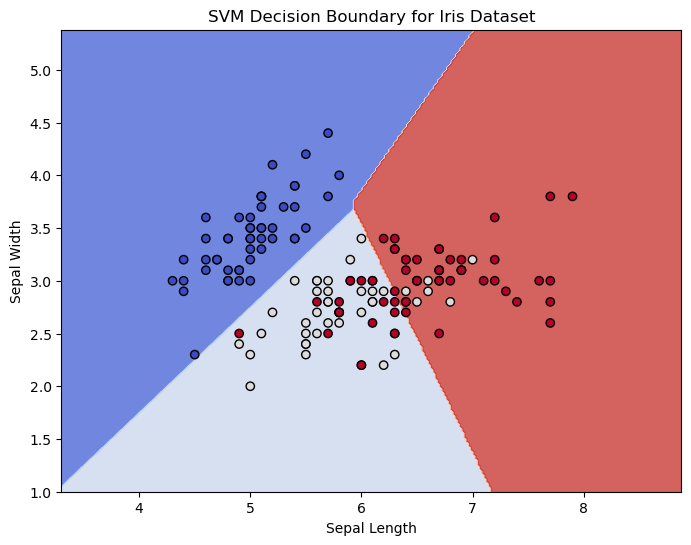

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset (you can replace it with any other dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Fit the SVM model to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a meshgrid to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions for each point in the meshgrid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

# Add labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary for Iris Dataset')

# Show the plot
plt.show()
